# IHC stained imaged data

This tutorial will guide you through the process of running SpaHDmap on IHC stained imaged ST data. Please see [HE-imaged ST](./HE-image.ipynb) for a more comprehensive introduction to SpaHDmap.

Our example data is a 10X Visium ST dataset MBC-01 sequenced from an adult mouse brain coronal section, comprising three immunohistochemistry (IHC) stained images (DAPI, Anti-GFAP, Anti-NeuN), we will take the IHC image and the spot expression data as input to run SpaHDmap. This data could be downloaded from [10X Genomics](https://www.10xgenomics.com/datasets/adult-mouse-brain-section-2-coronal-stains-dapi-anti-gfap-anti-neu-n-1-standard-1-1-0).

## 1. Import necessary libraries

In [1]:
import torch
import numpy as np
import scanpy as sc

import SpaHDmap as map

## 2. Set the parameters and paths

In this section, we will set the parameters and paths for the SpaHDmap model, including:

**Parameters**:
- `rank`: the rank / number of components of the NMF model
- `seed`: the random seed
- `verbose`: whether to print the log information

**Paths**:
- `root_path`: the root path of the experiment
- `project`: the name of the project
- `results_path`: the path to save the results

### Parameters settings

By default, we set the `rank` to 20, the `seed` to 123, and the `verbose` to True. You can modify the parameters according to your data.

In [2]:
rank = 20
seed = 123
verbose = True

np.random.seed(seed)
torch.manual_seed(seed)

### Paths settings

These paths are set with respect to the current directory. You can modify the paths according to your data.

In [3]:
root_path = '../experiments/'
project = 'MBC01'

results_path = f'{root_path}/{project}/Results_Rank{rank}/'

## 3. Load the data and pre-process

The data used in this tutorial is a 10X Visium ST dataset MBC-01 sequenced from an adult mouse brain coronal section, could be downloaded from [10X Genomics](https://www.10xgenomics.com/datasets/adult-mouse-brain-section-2-coronal-stains-dapi-anti-gfap-anti-neu-n-1-standard-1-1-0).

Next, we download the data from 10X Genomics using scanpy.

In [4]:
section_id = 'V1_Adult_Mouse_Brain_Coronal_Section_2'

# Download the data from the 10X website (set include_hires_tiff=True to download the hires image)
adata = sc.datasets.visium_sge(section_id, include_hires_tiff=True)
image_path = adata.uns["spatial"][section_id]["metadata"]["source_image_path"]

# or load the data from a local folder
# adata = sc.read_visium(f'data/{section_id}')
# image_path = f'data/{section_id}/image.tif'

/home/qk/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qk/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Then we can load and preprocess the data.

In [5]:
# Load the data from an AnnData object
mouse_cortex = map.prepare_stdata(adata=adata, section_name='mouse_cortex', image_path=image_path)

map.select_svgs(mouse_cortex, n_top_genes=3000)

*** Reading and preparing AnnData for section mouse_cortex ***
Spot radius found in AnnData: 89
Pre-processing gene expression data for 2807 spots and 32285 genes.
Swapping x and y coordinates.
Processing image, seems to be Protein image.


/home/qk/anaconda3/lib/python3.11/site-packages/squidpy/gr/_utils.py:194: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data


Selected 3000 SVGs.


In [6]:
mouse_cortex

STData object for section: mouse_cortex
Number of spots: 2807
Number of genes: 3000
Image shape: (3, 24240, 24240)
Scale factor: 1
Spot radius: 89
Image type: Protein
Available scores: 

## 4. Run SpaHDmap

Same to case of analyzing HE-image 10X Visium ST data, we initialize the Fuser object and run SpaHDmap.

In [7]:
# Initialize the SpaHDmap runner
fuser = map.Fuser(mouse_cortex, results_path=results_path, verbose=True)

# Run SpaHDmap in one function
fuser.run_SpaHDmap()

*** Using GPU ***
*** Preparing the tissue splits and creating pseudo spots... ***
For section mouse_cortex, divide the tissue into 4495 sub-tissues, and create 15000 pseudo spots
Step 1: Run NMF
*** Performing NMF... ***
*** Visualizing and saving the embeddings of NMF... ***
Step 2: Pre-train the SpaHDmap model
*** Pre-trained model found at ../experiments//MBC2/Results_Rank20//models//pretrained_model.pth, loading... ***
Step 3: Train the GCN model
*** Performing GCN... ***
*** Training GCN for mouse_cortex... ***
[Iter: 200 / 5000], Loss: 0.018156, Learning rate: 4.985215e-03
[Iter: 400 / 5000], Loss: 0.005967, Learning rate: 4.941093e-03
[Iter: 600 / 5000], Loss: 0.005441, Learning rate: 4.868331e-03
[Iter: 800 / 5000], Loss: 0.005305, Learning rate: 4.768075e-03
[Iter: 1000 / 5000], Loss: 0.005245, Learning rate: 4.641907e-03
[Iter: 1200 / 5000], Loss: 0.005199, Learning rate: 4.491816e-03
[Iter: 1400 / 5000], Loss: 0.005164, Learning rate: 4.320170e-03
[Iter: 1600 / 5000], Loss:

After training, NMF, GCN and SpaHDmap scores are available now.

In [8]:
mouse_cortex

STData object for section: mouse_cortex
Number of spots: 2807
Number of genes: 3000
Image shape: (3, 24240, 24240)
Scale factor: 1
Spot radius: 89
Image type: Protein
Available scores: NMF, GCN, VD, SpaHDmap

*** Visualizing and saving the embeddings of NMF... ***


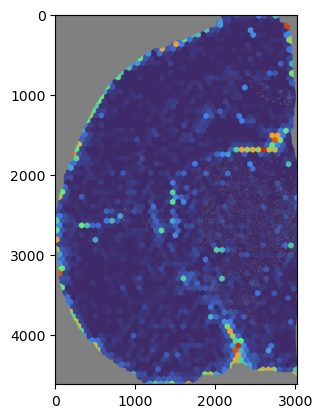

In [9]:
# Visualize the NMF score
fuser.visualize(mouse_cortex, score='NMF', index=18)

*** Visualizing and saving the embeddings of GCN... ***


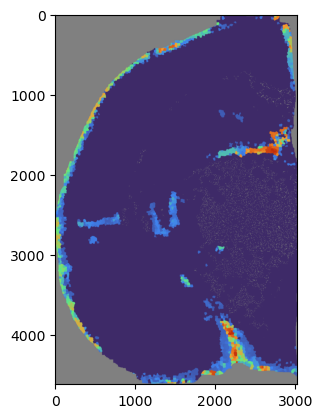

In [10]:
# Visualize the GCN score
fuser.visualize(mouse_cortex, score='GCN', index=18)

*** Visualizing and saving the embeddings of SpaHDmap... ***


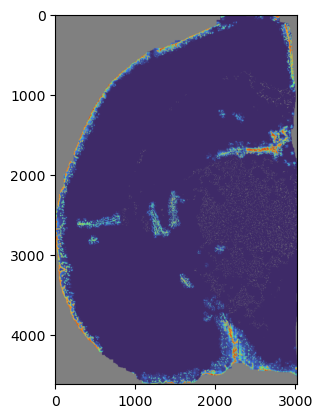

In [11]:
# Visualize the SpaHDmap score
fuser.visualize(mouse_cortex, score='SpaHDmap', index=18)

The final metagene matrix is stored in the `metagene` attribute of the Fuser object.

In [12]:
fuser.metagene.head()

,Embedding_1,Embedding_2,Embedding_3,Embedding_4,Embedding_5,Embedding_6,Embedding_7,Embedding_8,Embedding_9,Embedding_10,Embedding_11,Embedding_12,Embedding_13,Embedding_14,Embedding_15,Embedding_16,Embedding_17,Embedding_18,Embedding_19,Embedding_20
Ttr,0.349514,1.880236,1.902636,1.043267,0.339830,1.111881,1.674706,10.725852,0.691906,0.433424,5.650170,1.977497,2.318756,0.481379,1.234288,0.082925,1.204045,0.380605,0.500083,0.888374
Pmch,0.000000,0.134108,0.730287,4.501104,0.000000,0.321760,0.208429,0.236070,0.000000,0.115343,0.158010,0.000000,0.104626,0.000000,0.181168,0.000000,0.155981,0.265085,0.173764,0.570562
Nrgn,0.968281,1.428657,1.103969,1.112306,0.000000,2.976853,1.537472,0.334111,0.338492,3.638869,1.574006,0.386243,1.908823,1.730558,2.499608,1.572286,2.907559,2.825341,1.303360,0.253605
Mbp,0.236456,6.538983,4.170027,3.079699,0.774271,1.692225,2.198624,1.609587,0.719926,1.852861,3.044929,3.404371,1.774823,3.639998,2.459524,2.419191,2.479607,1.659025,1.679508,3.568661
Prkcd,0.062863,0.356173,3.713426,0.036247,0.115470,0.333458,0.080529,0.126349,0.055478,0.036110,0.141254,1.152139,0.000000,0.236460,0.000000,0.318430,0.487971,0.003927,0.298308,0.504163
